In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/nuclearfusion-data/fusion_experiment.csv


In [4]:
filepath = '/kaggle/input/nuclearfusion-data/fusion_experiment.csv'
fusion_data = pd.read_csv(filepath)

print(fusion_data.columns)

Index(['Unnamed: 0', 'Magnetic Field Fluctuations', 'Leakage', 'Instabilities',
       'Plasma Instabilities', 'Magnetic Field Strength',
       'Magnetic Field Configuration', 'Injection Energy', 'Beam Symmetry',
       'Target Density', 'Target Composition', 'Fuel Density', 'Temperature',
       'Confinement Time', 'Fuel Purity', 'Energy Input', 'Power Output',
       'Pressure', 'Neutron Yield', 'Ignition'],
      dtype='object')


In [5]:
#Explore the dataset
print(fusion_data.head()) #First Few Rows
print(fusion_data.info()) # Data types & Missing values
print(fusion_data.describe()) # Summary Stats



   Unnamed: 0  Magnetic Field Fluctuations   Leakage  Instabilities  \
0           0                     0.037454  0.058078       0.028259   
1           1                     0.095071  0.052697       0.045868   
2           2                     0.073199  0.035104       0.009922   
3           3                     0.059866  0.049321       0.044684   
4           4                     0.015602  0.036510       0.020308   

   Plasma Instabilities  Magnetic Field Strength Magnetic Field Configuration  \
0              0.015705                 9.000578                      tokamak   
1              0.009551                 3.841421         reversed field pinch   
2              0.013794                 1.467187                  stellarator   
3              0.047349                 9.277696                      tokamak   
4              0.088453                 4.926347         reversed field pinch   

   Injection Energy  Beam Symmetry  Target Density Target Composition  \
0          5.

In [6]:
#Preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_columns = fusion_data.select_dtypes(include = ['object', 'category']).columns
numerical_columns = fusion_data.select_dtypes(include=['int','float']).columns

#encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    fusion_data[col] = label_encoder.fit_transform(fusion_data[col])

#Step 3: Convert all columns to float
fusion_data = fusion_data.astype(float)

print(fusion_data.dtypes)


Unnamed: 0                      float64
Magnetic Field Fluctuations     float64
Leakage                         float64
Instabilities                   float64
Plasma Instabilities            float64
Magnetic Field Strength         float64
Magnetic Field Configuration    float64
Injection Energy                float64
Beam Symmetry                   float64
Target Density                  float64
Target Composition              float64
Fuel Density                    float64
Temperature                     float64
Confinement Time                float64
Fuel Purity                     float64
Energy Input                    float64
Power Output                    float64
Pressure                        float64
Neutron Yield                   float64
Ignition                        float64
dtype: object


Training set shape: (80000, 19)
Testing set shape: (20000, 19)


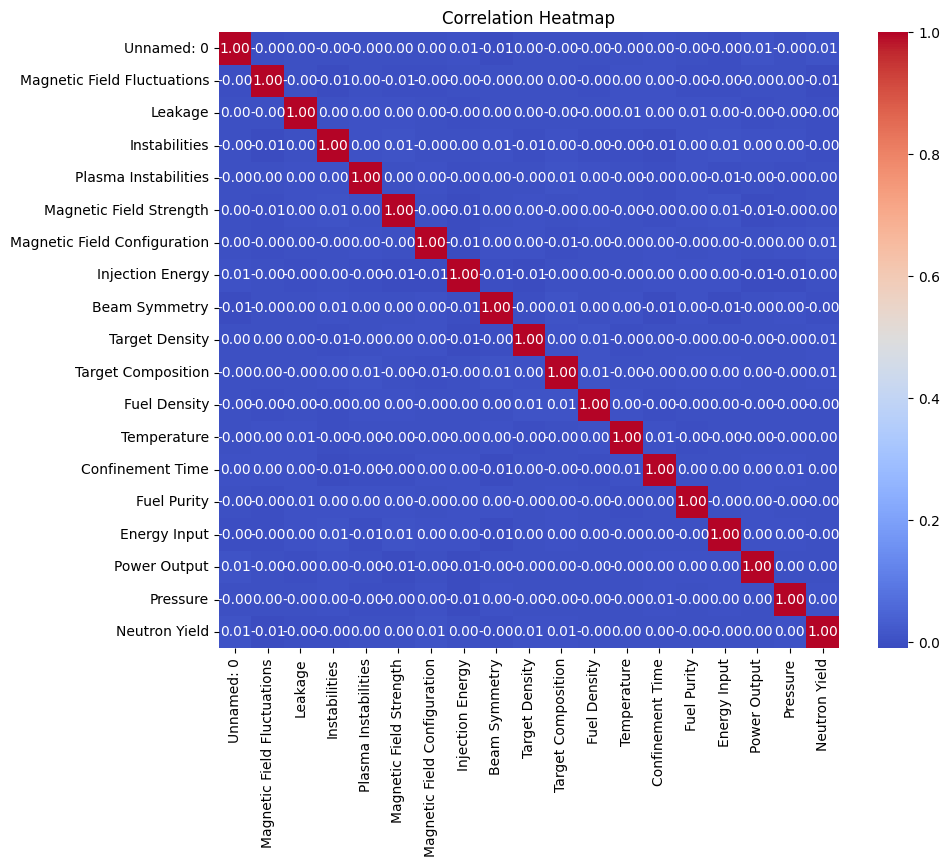

VIF Table:
                         Feature       VIF
0                     Unnamed: 0  0.895795
1    Magnetic Field Fluctuations  0.894155
2                        Leakage  0.894976
3                  Instabilities  0.892120
4           Plasma Instabilities  0.895026
5        Magnetic Field Strength  0.850295
6   Magnetic Field Configuration  0.946276
7               Injection Energy  0.847417
8                  Beam Symmetry  0.894696
9                 Target Density  0.825462
10            Target Composition  0.946412
11                  Fuel Density  0.828546
12                   Temperature  0.735132
13              Confinement Time  0.854185
14                   Fuel Purity  0.000002
15                  Energy Input  0.791421
16                  Power Output  0.895123
17                      Pressure  0.825479
18                 Neutron Yield  0.828726


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

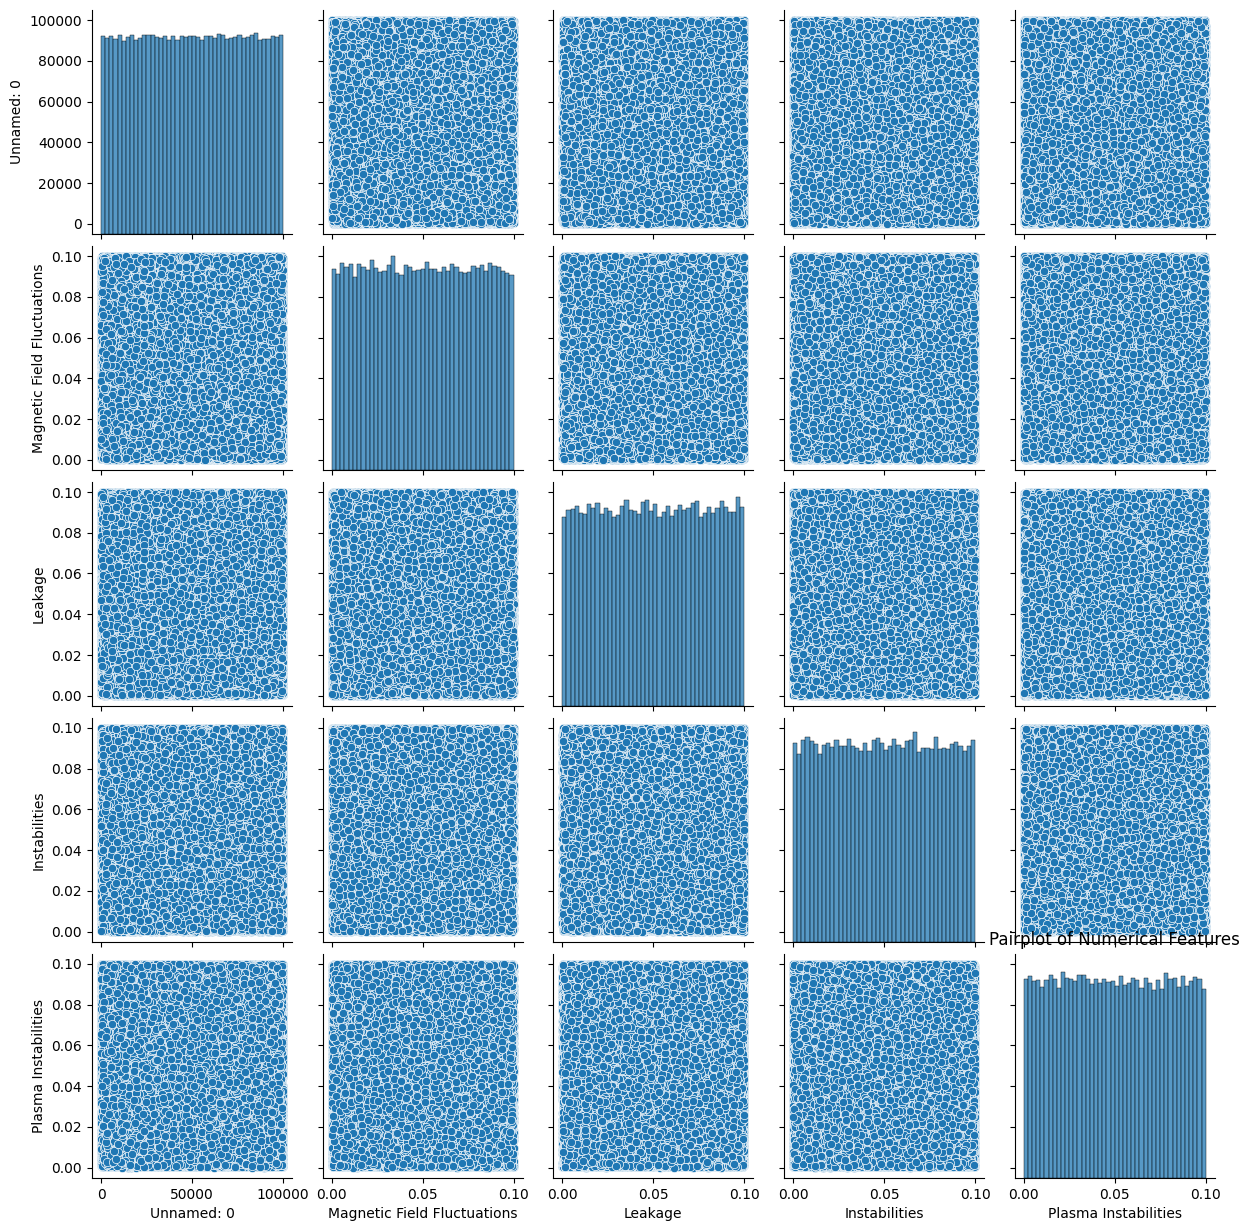

In [7]:
#Check for colinearity
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 2: Train-Test Split
X = fusion_data.drop('Ignition', axis=1)  # Replace 'target_column' with your target variable
y = fusion_data['Ignition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Method 1: Correlation Matrix and Heatmap
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Method 2: Variance Inflation Factor (VIF)
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif_table = calculate_vif(X_train)
print("VIF Table:")
print(vif_table)

numerical_columns = X_train.select_dtypes(include=['float', 'int']).columns[:5]  # Limit to 5 columns for clarity
sns.pairplot(X_train[numerical_columns])
plt.title("Pairplot of Numerical Features")
plt.show()

In [8]:
print(fusion_data['Fuel Purity'].value_counts())

Fuel Purity
99.971295    1
99.979247    1
99.985692    1
99.955632    1
99.944165    1
            ..
99.931375    1
99.957984    1
99.925864    1
99.988095    1
99.978973    1
Name: count, Length: 100000, dtype: int64


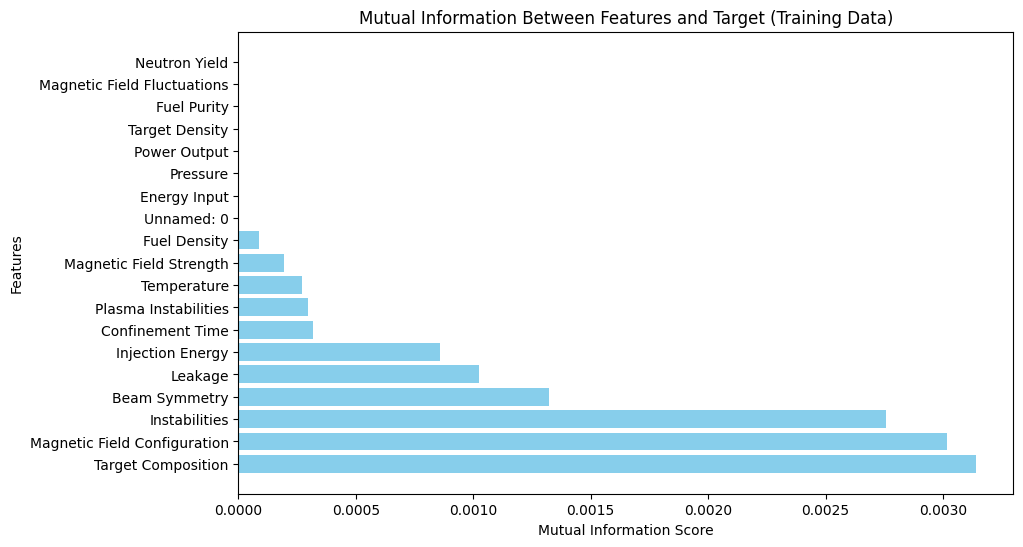

                         Feature  Mutual Information
10            Target Composition            0.003142
6   Magnetic Field Configuration            0.003017
3                  Instabilities            0.002757
8                  Beam Symmetry            0.001321
2                        Leakage            0.001023
7               Injection Energy            0.000858
13              Confinement Time            0.000316
4           Plasma Instabilities            0.000295
12                   Temperature            0.000269
5        Magnetic Field Strength            0.000194
11                  Fuel Density            0.000086
0                     Unnamed: 0            0.000000
15                  Energy Input            0.000000
17                      Pressure            0.000000
16                  Power Output            0.000000
9                 Target Density            0.000000
14                   Fuel Purity            0.000000
1    Magnetic Field Fluctuations            0.

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
import matplotlib.pyplot as plt


# Calculate Mutual Information
# Use mutual_info_regression for regression tasks or mutual_info_classif for classification tasks
if y_train.dtype == 'object' or y_train.nunique() < 10:  # Classification task
    mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
else:  # Regression task
    mi_scores = mutual_info_regression(X_train, y_train, random_state=42)

# store feature names and their MI scores
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mi_scores})

# Sort the DataFrame by MI scores in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Step 2: Visualize Mutual Information Scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Between Features and Target (Training Data)')
plt.show()

# Display the MI scores table
print(mi_df)

In [11]:
selected_features = [
    "Target Composition", 
    "Magnetic Field Configuration", 
    "Instabilities",
    "Beam Symmetry", 
    "Leakage", 
    "Injection Energy"
]


In [13]:
X = fusion_data[selected_features]  # Keep only selected features
y = fusion_data["Ignition"]         # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80000, 6)
X_test shape: (20000, 6)
y_train shape: (80000,)
y_test shape: (20000,)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("🔹 Random Forest Performance")
print(classification_report(y_test, rf_pred))


🔹 Random Forest Performance
              precision    recall  f1-score   support

         0.0       0.70      0.97      0.81     13980
         1.0       0.30      0.03      0.05      6020

    accuracy                           0.69     20000
   macro avg       0.50      0.50      0.43     20000
weighted avg       0.58      0.69      0.58     20000



In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
print("\n🔹 K-Nearest Neighbors (KNN) Performance")
print(classification_report(y_test, knn_pred))



🔹 K-Nearest Neighbors (KNN) Performance
              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76     13980
         1.0       0.31      0.17      0.21      6020

    accuracy                           0.64     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.58      0.64      0.60     20000



In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define parameter distributions for random search
param_dist = {
    'hidden_layer_sizes': [(256, 128, 64, 32, 16), (128, 64, 32, 16), (256, 128, 64), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-4, -1, 10),  # Regularization strength (log scale for wider search)
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the base MLP model
mlp_base = MLPClassifier(max_iter=500, random_state=42)

# Randomized Search for best parameters
random_search = RandomizedSearchCV(
    mlp_base, param_distributions=param_dist, n_iter=20,  # Try 20 random combinations
    cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42
)
random_search.fit(X_train, y_train)

# Best Model
best_mlp_model = random_search.best_estimator_

# Predict on test data
mlp_pred = best_mlp_model.predict(X_test)

# Evaluate performance
mlp_acc = accuracy_score(y_test, mlp_pred)
print("\n🔹 Tuned Neural Network (MLP) Performance")
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, mlp_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

🔹 Tuned Neural Network (MLP) Performance
Best Parameters: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (128, 64, 32, 16), 'alpha': 0.0001, 'activation': 'tanh'}
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82     13980
         1.0       0.00      0.00      0.00      6020

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


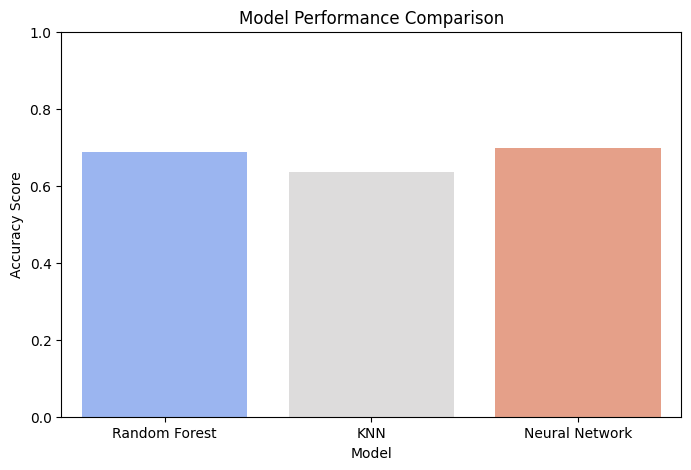

In [24]:
# Store results in a dictionary
results = {
    "Random Forest": rf_acc,
    "KNN": knn_acc,
    "Neural Network": mlp_acc
}

# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Plot Accuracy Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.show()


ExactExplainer explainer: 20001it [05:46, 56.95it/s]                           


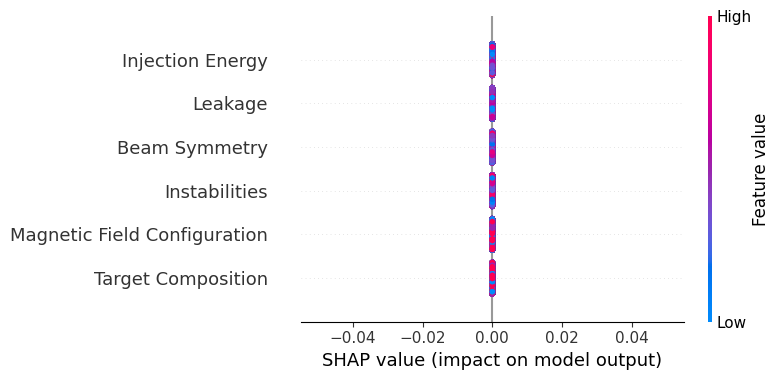

In [25]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_mlp_model.predict, X_train)
shap_values = explainer(X_test)

# Visualize the feature importance
shap.summary_plot(shap_values, X_test)


In [26]:
import joblib

# Save the model to a file
joblib.dump(best_mlp_model, "mlp_model.pkl")

# Load the model whenever needed
loaded_model = joblib.load("mlp_model.pkl")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import joblib

# Load the trained model (assuming it's already saved)
# model = joblib.load("mlp_model.pkl")  # Uncomment if you want to load a saved model

# Generate predictions from the test set
mlp_pred = best_mlp_model.predict(X_test)

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, len(X_test))  # Set x-axis limits based on test set length
ax.set_ylim(0, 1)  # Set y-axis for binary classification (adjust based on your task)

# Create empty line to update during animation
line_actual, = ax.plot([], [], 'bo-', label="Actual", markersize=5)
line_pred, = ax.plot([], [], 'ro-', label="Predicted", markersize=5)

# Label the axes
ax.set_xlabel("Sample Index")
ax.set_ylabel("Class Value")
ax.set_title("Actual vs Predicted Values Animation")
ax.legend()

# Function to initialize the plot
def init():
    line_actual.set_data([], [])
    line_pred.set_data([], [])
    return line_actual, line_pred

# Function to update the plot at each frame
def update(frame):
    # Accumulate actual and predicted values up to the current frame
    line_actual.set_data(np.arange(frame), y_test[:frame])
    line_pred.set_data(np.arange(frame), mlp_pred[:frame])
    return line_actual, line_pred

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(X_test), init_func=init, blit=True, interval=50)

# Save the animation
ani.save("/kaggle/working/test_predictions_animation.gif", writer='imagemagick', fps=30)

# Optionally, display the animation inline (if running in a notebook)
from IPython.display import HTML
HTML("/kaggle/working/test_predictions_animation.gif")
